

# Bitcoin Forcasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('../datasets/BitcoinHistoricalData.csv', parse_dates=[0], index_col=0)

In [3]:
df.sort_index(axis=0, inplace=True)

In [4]:
df


,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2016-03-10,415.8,412.8,417.5,410.3,55.74K,0.74%
2016-03-11,419.1,415.8,422.4,415.1,60.63K,0.79%
2016-03-12,410.4,419.1,420.7,407.0,59.64K,-2.09%
2016-03-13,412.4,410.4,415.9,409.6,34.98K,0.50%
2016-03-14,414.3,412.4,416.1,411.2,49.33K,0.46%
...,...,...,...,...,...,...
2022-03-11,"38,730.2","39,422.5","40,177.0","38,236.4",2.79B,-1.74%
2022-03-12,"38,814.3","38,730.2","39,355.3","38,666.5",1.11B,0.22%
2022-03-13,"37,792.4","38,813.2","39,272.3","37,603.4",1.55B,-2.63%


In [5]:
df.describe()

,Price,Open,High,Low,Vol.,Change %
count,2197,2197,2197,2197,2197,2197
unique,2171,2164,2165,2167,2083,1080
top,583.6,"10,104.9",678.4,592.8,1.05M,-0.06%
freq,2,2,2,3,6,10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2197 entries, 2016-03-10 to 2022-03-15
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     2197 non-null   object
 1   Open      2197 non-null   object
 2   High      2197 non-null   object
 3   Low       2197 non-null   object
 4   Vol.      2197 non-null   object
 5   Change %  2197 non-null   object
dtypes: object(6)
memory usage: 120.1+ KB


## Preprocessing

In [7]:
def format_data(num):
    nums = num.split(',');
    if(len(nums) == 2):
        n = float(nums[0] + nums[1])
    else:
        n = float(nums[0])
    return n

In [8]:
df['Price'] = df['Price'].apply(format_data)

In [9]:
df['Open'] = df['Open'].apply(format_data)

In [10]:
df['High'] = df['High'].apply(format_data)

In [11]:
df['Low'] = df['Low'].apply(format_data)

In [12]:
from collections import Counter

arr=[]

for i in df["Vol."]:
  arr.append(i[-1])

Counter(arr).keys()

dict_keys(['K', 'M', 'B'])

In [13]:
def format_vol(x):
    if(x[-1] == 'K'):
        n = float(x[:-1]) * 1000
    elif(x[-1] == 'M'):
        n = float(x[:-1]) * 1000000
    elif(x[-1]== 'B'):
        n = float(x[:-1]) * 1000000000
    elif(x == '-'):
        n = 0
    return n

In [14]:
df['Vol.'] = df['Vol.'].apply(format_vol)

In [15]:
def formate_change(x):
    n = float(x[:-1])
    return n

In [16]:
df['Change %'] = df['Change %'].apply(formate_change)

In [17]:
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2016-03-10,415.8,412.8,417.5,410.3,5.574000e+04,0.74
2016-03-11,419.1,415.8,422.4,415.1,6.063000e+04,0.79
2016-03-12,410.4,419.1,420.7,407.0,5.964000e+04,-2.09
2016-03-13,412.4,410.4,415.9,409.6,3.498000e+04,0.50
2016-03-14,414.3,412.4,416.1,411.2,4.933000e+04,0.46
...,...,...,...,...,...,...
2022-03-11,38730.2,39422.5,40177.0,38236.4,2.790000e+09,-1.74
2022-03-12,38814.3,38730.2,39355.3,38666.5,1.110000e+09,0.22
2022-03-13,37792.4,38813.2,39272.3,37603.4,1.550000e+09,-2.63


In [18]:
df.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [20]:
df.isna().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2197 entries, 2016-03-10 to 2022-03-15
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2197 non-null   float64
 1   Open      2197 non-null   float64
 2   High      2197 non-null   float64
 3   Low       2197 non-null   float64
 4   Vol.      2197 non-null   float64
 5   Change %  2197 non-null   float64
dtypes: float64(6)
memory usage: 120.1 KB


In [22]:
df.nunique()

Price       2171
Open        2164
High        2165
Low         2167
Vol.        2083
Change %    1079
dtype: int64

## Resampling Data

A - Year, M - Month End, W - Weekly, D - Daily, MS - Month Start

In [20]:
monthly_df = df['Open'].resample('MS').mean()

In [21]:
monthly_df

Date
2016-03-01      414.900000
2016-04-01      432.353333
2016-05-01      458.758065
2016-06-01      634.943333
2016-07-01      661.712903
                  ...     
2021-11-01    60825.520000
2021-12-01    49642.796774
2022-01-01    41342.987097
2022-02-01    40572.103571
2022-03-01    40270.493333
Freq: MS, Name: Open, Length: 73, dtype: float64

## Visulization

Overall Plot


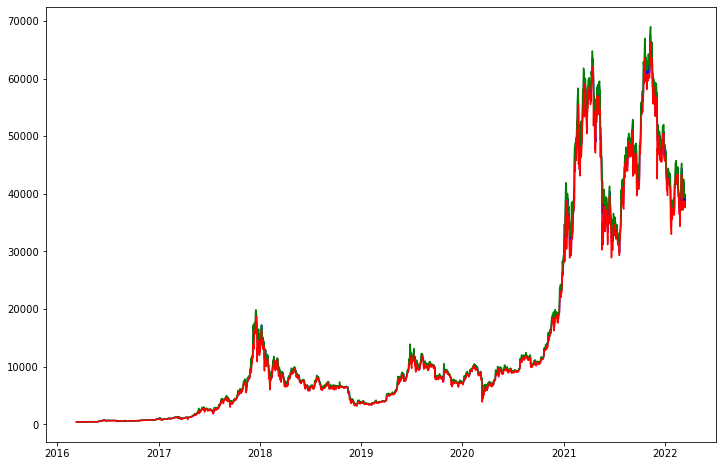

In [25]:
plt.figure(figsize=(12, 8))
plt.plot(df['Open'], color='blue')
plt.plot(df['High'], color='green')
plt.plot(df['Low'], color='red')

Yr 2021 Plot

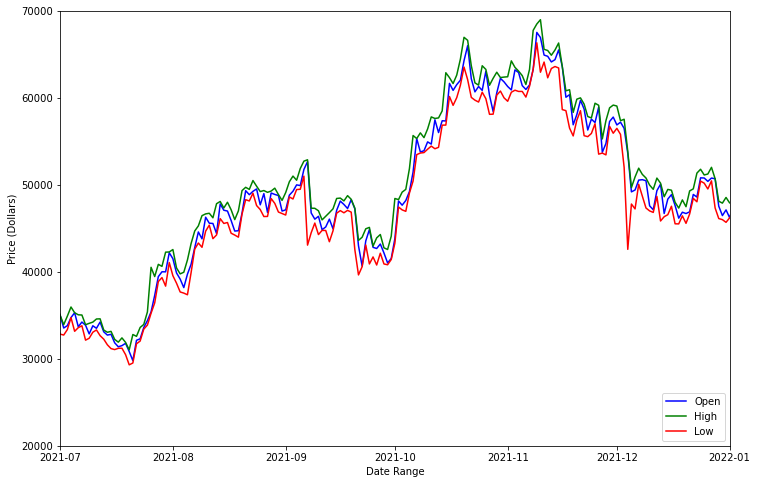

In [26]:
plt.figure(figsize=(12, 8))
plt.plot(df['Open'], color='blue', label="Open")
plt.plot(df['High'], color='green', label="High")
plt.plot(df['Low'], color='red', label="Low")
plt.xlim(datetime.date(2021, 7, 1), datetime.date(2022, 1, 1))
plt.ylim(20000,70000)
plt.xlabel("Date Range")
plt.ylabel("Price (Dollars)")
plt.legend(loc="lower right")

Overall Change

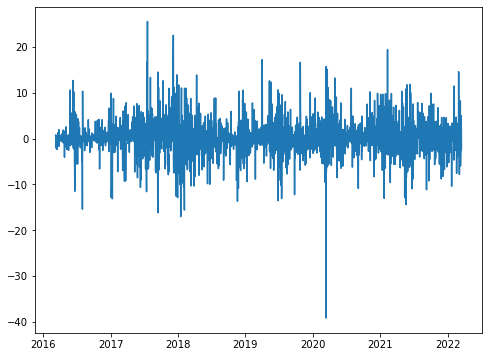

In [27]:
plt.figure(figsize=(8, 6))
plt.plot(df['Change %'])

<AxesSubplot:xlabel='Date'>

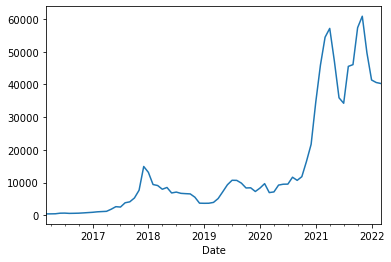

In [28]:
# Monthly Data plotting
monthly_df.plot()

Text(0, 0.5, 'Open cost')

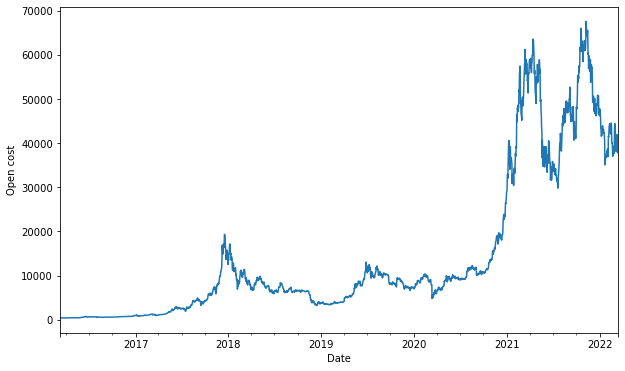

In [29]:
plt.figure(figsize=(10, 6))
df['Open'].plot()
plt.ylabel('Open cost')

Is this data stationary? (means mean, variance and covariance is constant over time.)

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

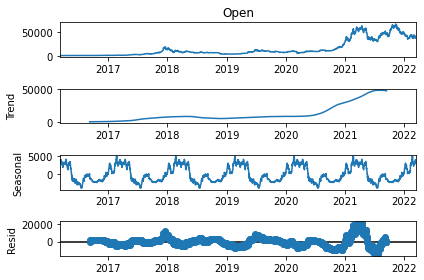

In [34]:
decomposition = seasonal_decompose(df['Open'], model='additive', period=365)
fig = decomposition.plot()
plt.show()

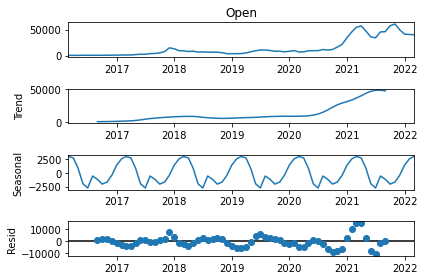

In [35]:
decomposition = seasonal_decompose(monthly_df, model='additive')
fig = decomposition.plot()
plt.show()

### To check if data is stationary

In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
# h0: It is non stationary
# h1: It is stationary

def adfuller_test(data):
    result = adfuller(data)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of observations Used']
    for value, label in zip(result, labels):
        print(label+" : "+str(value))
    if result[1] <= 0.05:
        print("String evidence against the null hypothesis(h0), reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")

In [38]:
adfuller_test(df['Open'])

ADF Test Statistic : -0.9787897471680876
p-value : 0.7609214383652995
#Lags Used : 24
Number of observations Used : 2172
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


In [39]:
adfuller_test(monthly_df)

ADF Test Statistic : -0.2608941224382412
p-value : 0.9308631857157659
#Lags Used : 6
Number of observations Used : 66
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


## Making Stationary

In [25]:
p_values = []
for i in range(1, 62):
    tdf = df['Open'].diff(periods=i)
    res = adfuller(tdf.dropna())
    p_values.append([i, res[1]])
p_values.sort(key = lambda x: x[1])
p_values[:10]

[[1, 3.619615074773951e-15],
 [3, 1.3452200938994154e-12],
 [4, 7.175049366324195e-12],
 [27, 1.3078974317811245e-11],
 [9, 1.515061905063529e-11],
 [14, 7.559532245783319e-11],
 [28, 1.1402853242311794e-10],
 [6, 1.2048604840425222e-10],
 [2, 1.336608496347259e-10],
 [15, 2.7015638208772805e-10]]

In [26]:
rate_diff = df['Open'].diff(periods=27)
rate_diff.dropna(inplace=True)

In [27]:
rate_diff

Date
2016-04-06       9.3
2016-04-07       5.5
2016-04-08       1.0
2016-04-09       7.3
2016-04-10       5.6
               ...  
2022-03-11   -2965.9
2022-03-12   -3475.3
2022-03-13   -3247.9
2022-03-14   -4760.8
2022-03-15   -4867.9
Name: Open, Length: 2170, dtype: float64

In [28]:
adfuller_test(rate_diff)

ADF Test Statistic : -7.70510911799504
p-value : 1.3078974317811245e-11
#Lags Used : 26
Number of observations Used : 2143
String evidence against the null hypothesis(h0), reject the null hypothesis. Data has no unit root and is stationary.


<AxesSubplot:xlabel='Date'>

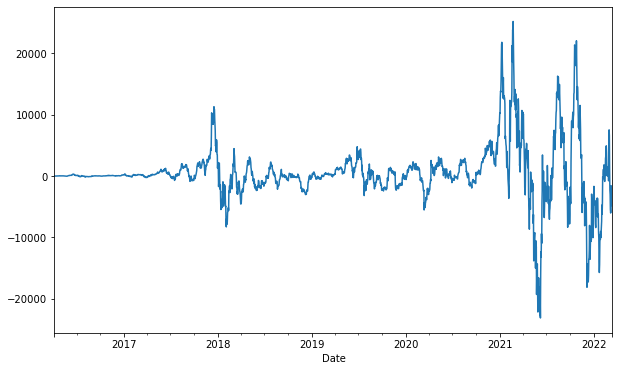

In [44]:
plt.figure(figsize=(10, 6))
rate_diff.plot()

Monthly data

In [45]:
p_values = []
for i in range(1, 12):
    tdf = monthly_df.diff(periods=i)
    res = adfuller(tdf.dropna())
    p_values.append([i, res[1]])
p_values.sort(key = lambda x: x[1])
p_values

[[6, 0.012585502677653194],
 [3, 0.022350140268688735],
 [7, 0.03024812391761565],
 [1, 0.0507840088246837],
 [2, 0.07296679339364741],
 [4, 0.13002862132631865],
 [5, 0.24084132134412023],
 [11, 0.5887749347811927],
 [9, 0.7287284605482751],
 [8, 0.8070544422219219],
 [10, 0.9379158382782229]]

In [29]:
seasonal_monthly_df = monthly_df.diff(periods=9)

In [30]:
seasonal_monthly_df

Date
2016-03-01             NaN
2016-04-01             NaN
2016-05-01             NaN
2016-06-01             NaN
2016-07-01             NaN
                  ...     
2021-11-01    14962.220000
2021-12-01    -4771.135484
2022-01-01   -15766.789570
2022-02-01    -6528.483525
2022-03-01     4370.373333
Freq: MS, Name: Open, Length: 73, dtype: float64

In [31]:
adfuller_test(seasonal_monthly_df.dropna())

ADF Test Statistic : -1.0652515481586038
p-value : 0.7287284605482751
#Lags Used : 9
Number of observations Used : 54
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


<AxesSubplot:xlabel='Date'>

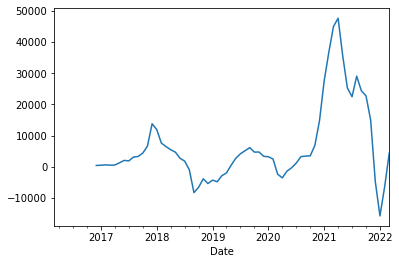

In [49]:
seasonal_monthly_df.plot()

## Visulizing PACF and ACF Plots

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\nihal\Anaconda3\envs\MLProjects\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


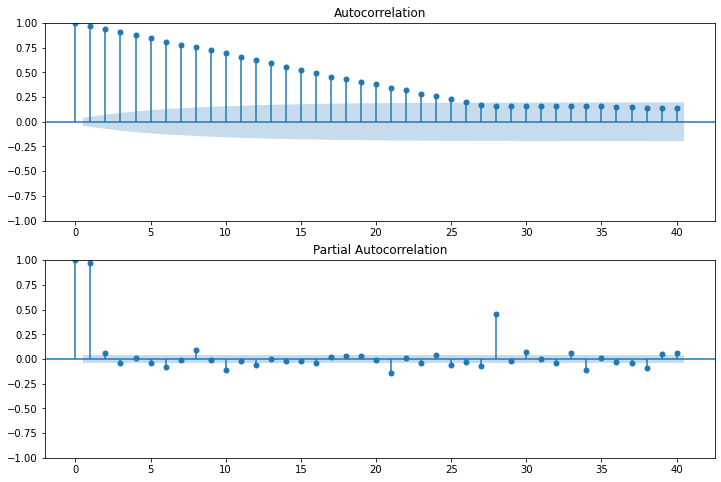

In [51]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(rate_diff.dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(rate_diff.dropna(), lags=40, ax=ax2)

AR value must be 2 (p). q will be 0

C:\Users\nihal\Anaconda3\envs\MLProjects\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


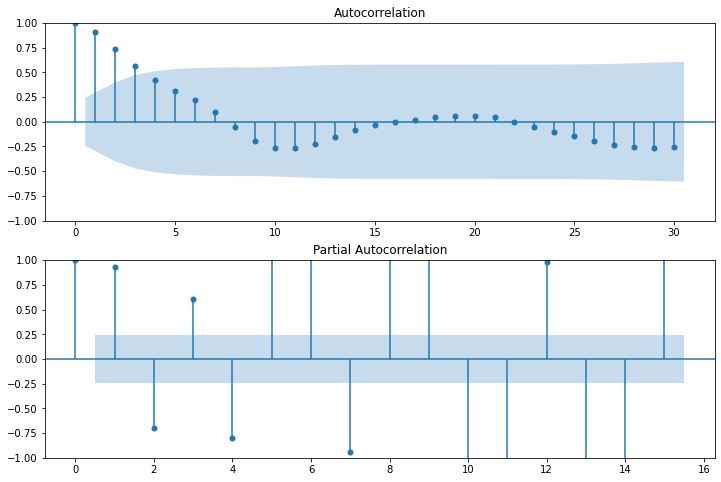

In [52]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(seasonal_monthly_df.dropna(), lags=30, ax=ax1)
#Here lags are basically the number of time  periods we skip to observe correlation in our data.
ax2 = fig.add_subplot(212)
fig = plot_pacf(seasonal_monthly_df.dropna(), lags=15, ax=ax2)

AR value must be 2 (p). q will be 0.

Since our data is seasonally changing we have a wave like plot for the autocorrelation. This pattern decreases gradually as the number of lags increase.

Looking at the partial autocorrelation plot we can see that there is no specific pattern which is being formed for a moving average or an autoregressive model.

So it is likely for ARIMA model to fail. Therefore to prove this we can try modelling and then go ahead with some other better model.

## Modeling

In [32]:
# Spliting the data into training and testing
X = df['Open']
print("Total Length of data:",len(X))
print("93% of data will be:", len(X)*0.93)
train_limit = int(len(X)*0.93)

Total Length of data: 2197
93% of data will be: 2043.21


In [33]:
train_x = X[:train_limit]
test_x = X[train_limit:]

In [34]:
test_x

Date
2021-10-13    56014.5
2021-10-14    57370.4
2021-10-15    57348.2
2021-10-16    61669.2
2021-10-17    60865.5
               ...   
2022-03-11    39422.5
2022-03-12    38730.2
2022-03-13    38813.2
2022-03-14    37789.5
2022-03-15    39673.0
Name: Open, Length: 154, dtype: float64

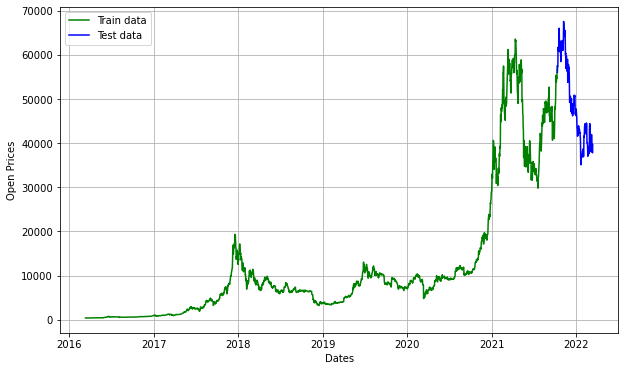

In [35]:
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.xlabel("Dates")
plt.ylabel("Open Prices")
plt.plot(train_x, 'green', label='Train data')
plt.plot(test_x, 'blue', label='Test data')
plt.legend()

##  ARIMA Model

In [59]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [60]:
model_arima = ARIMA(train_x, order=(4, 1, 0))
model_arima_fit = model_arima.fit()

C:\Users\nihal\Anaconda3\envs\MLProjects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\nihal\Anaconda3\envs\MLProjects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\nihal\Anaconda3\envs\MLProjects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [61]:
arima_pred = model_arima_fit.predict(start=train_limit, end=len(X)-1)

In [62]:
arima_pred_df = pd.DataFrame(arima_pred)
arima_pred_df = arima_pred_df.set_index(test_x.index)
arima_pred_df

,predicted_mean
Date,
2021-10-13,57393.741776
2021-10-14,57524.130230
2021-10-15,57625.286092
2021-10-16,57728.420592
2021-10-17,57729.576607
...,...
2022-03-11,57756.796910
2022-03-12,57756.796910
2022-03-13,57756.796910


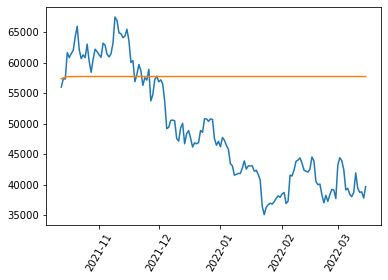

In [63]:
plt.plot(test_x)
plt.plot(arima_pred_df)
plt.xticks(rotation=60)
# plt.xlim(datetime.date(2021, 1, 1), datetime.date(2021, 5, 1))
plt.show()

As we can see that it does not do a good job as it is a very basic model and does not have seasonality involved.

In [64]:
monthly_df

Date
2016-03-01      414.900000
2016-04-01      432.353333
2016-05-01      458.758065
2016-06-01      634.943333
2016-07-01      661.712903
                  ...     
2021-11-01    60825.520000
2021-12-01    49642.796774
2022-01-01    41342.987097
2022-02-01    40572.103571
2022-03-01    40270.493333
Freq: MS, Name: Open, Length: 73, dtype: float64

In [65]:
monthly_train_len = len(monthly_df)*0.9
monthly_train_len

65.7

In [66]:
monthly_df.index[64]

Timestamp('2021-07-01 00:00:00', freq='MS')

In [68]:
train_monthly = monthly_df[:int(monthly_train_len)]
test_monthly = monthly_df[int(monthly_train_len):]

In [69]:
model_monthly = ARIMA(train_monthly, order=(4, 1, 0) )
model_arima_fit = model_arima.fit()

In [70]:
train_monthly.describe()

count       65.000000
mean     10367.541225
std      12938.038230
min        414.900000
25%       2626.383333
50%       7137.280000
75%       9826.216667
max      57109.776667
Name: Open, dtype: float64

In [71]:
arima_pred_monthly = model_arima_fit.predict(start=int(monthly_train_len), end=len(monthly_df)-1)

In [72]:
arima_pred_monthly_df = pd.DataFrame(arima_pred_monthly)
arima_pred_monthly_df.set_index(test_monthly.index, inplace=True)
arima_pred_monthly_df

,predicted_mean
Date,
2021-08-01,454.046445
2021-09-01,455.133857
2021-10-01,456.589964
2021-11-01,458.173645
2021-12-01,455.186404
2022-01-01,453.371097
2022-02-01,454.030411
2022-03-01,443.062866


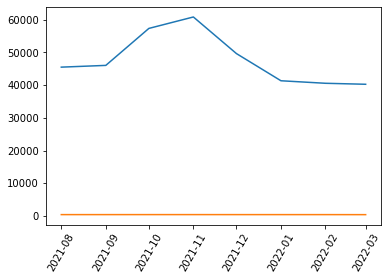

In [73]:
plt.plot(test_monthly)
plt.plot(arima_pred_monthly_df)
plt.xticks(rotation=60)
# plt.xlim(datetime.date(2016, 5, 13), datetime.date(2016, 5, 20))
plt.show()

## ARIMA Model with updating train with current data

In [79]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [75]:
training_data = list(train_x)
testing_data = list(test_x)

In [76]:
model_predictions = []
n_test_obser = len(testing_data)

In [85]:
for i in range(n_test_obser):
    model = ARIMA(training_data, order = (4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)

In [86]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2196
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -18002.059
Date:                Sun, 10 Apr 2022   AIC                          36014.119
Time:                        13:03:29   BIC                          36042.589
Sample:                             0   HQIC                         36024.523
                               - 2196                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0293      0.012     -2.429      0.015      -0.053      -0.006
ar.L2         -0.0135      0.011     -1.187      0.235      -0.036       0.009
ar.L3          0.0181      0.012      1.490      0.1

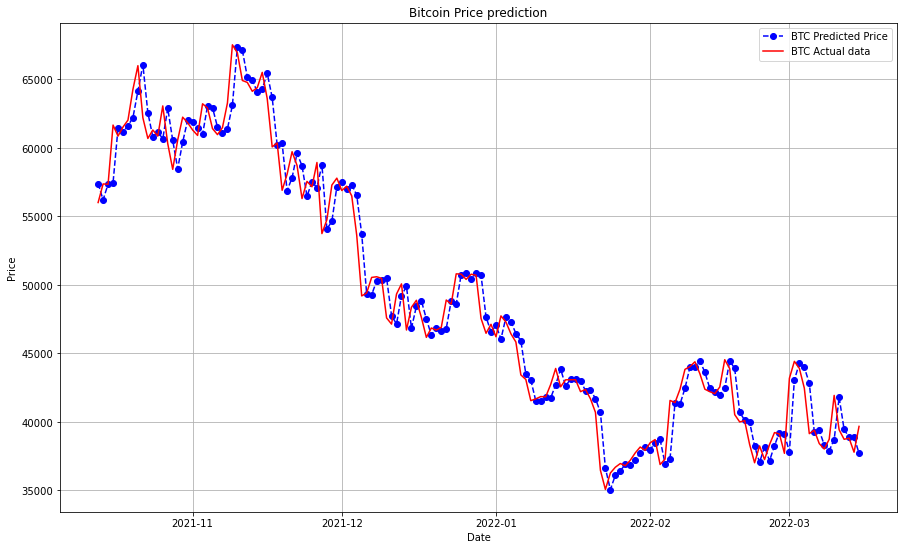

In [87]:
plt.figure(figsize=(15, 9))
plt.grid()

date_range = df[train_limit:].index
plt.plot(date_range, model_predictions, color='blue', marker='o', linestyle='dashed', label="BTC Predicted Price")
plt.plot(date_range, testing_data, color='red', label='BTC Actual data')

plt.title('Bitcoin Price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [88]:
# Mean absolute percentage error
mape = np.mean(np.abs(np.array(model_predictions) - np.array(testing_data))/np.abs(testing_data))
print("MAPE:", mape)

MAPE: 0.025412642942327843


In [89]:
mean_squared_error(testing_data, model_predictions)

2870204.6578757106

In [90]:
np.mean(testing_data)

48987.385064935064

## SARIMA

In [36]:
import statsmodels.api as sm

From above:  
AR value must be 2 (p). q will be 0. d = 1, season = 3  
AR value must be 2 (p). q will be 0. d = 1, season = 6

In [37]:
sarima_model_daily = sm.tsa.statespace.SARIMAX(train_x, order=(2, 1, 0), seasonal_order=(2, 1, 0, 3))
result_daily = sarima_model_daily.fit()

C:\Users\nihal\Anaconda3\envs\MLProjects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nihal\Anaconda3\envs\MLProjects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


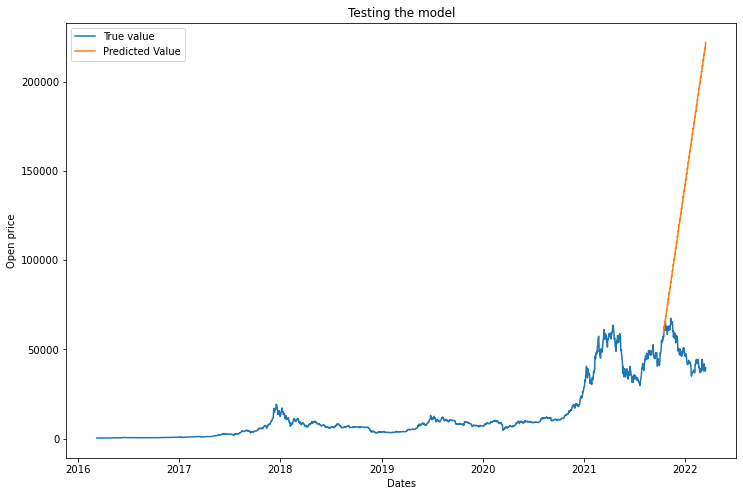

In [38]:
plt.figure(figsize=(12, 8))
daily_prediction = result_daily.predict(start=train_limit, end=len(X)-1)
plt.plot(X.index, X, label="True value")
plt.plot(daily_prediction, label="Predicted Value")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Testing the model")
plt.legend()

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [40]:
daily_prediction

2021-10-13     59047.944031
2021-10-14     58915.740674
2021-10-15     60673.999431
2021-10-16     62850.997014
2021-10-17     62200.398338
                  ...      
2022-03-11    216832.759207
2022-03-12    218612.026393
2022-03-13    218198.966723
2022-03-14    220021.006497
2022-03-15    221800.273682
Freq: D, Name: predicted_mean, Length: 154, dtype: float64

In [42]:
X[train_limit:]

Date
2021-10-13    56014.5
2021-10-14    57370.4
2021-10-15    57348.2
2021-10-16    61669.2
2021-10-17    60865.5
               ...   
2022-03-11    39422.5
2022-03-12    38730.2
2022-03-13    38813.2
2022-03-14    37789.5
2022-03-15    39673.0
Name: Open, Length: 154, dtype: float64

In [47]:
print("Mean of target value:", X[train_limit:].mean())
print("Mean Absolute error:", mean_absolute_error(X[train_limit:], daily_prediction))
print("Root mean squared error:", np.sqrt(mean_squared_error(X[train_limit:], daily_prediction)))

Mean of target value: 48987.385064935064
Mean Absolute error: 90788.81800406243
Root mean squared error: 106577.06683555442


In [94]:
sarima_model_daily = sm.tsa.statespace.SARIMAX(df['Open'], order=(2, 1, 0), seasonal_order=(2, 1, 0, 3))
result_daily = sarima_model_daily.fit()

C:\Users\nihal\Anaconda3\envs\MLProjects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\nihal\Anaconda3\envs\MLProjects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


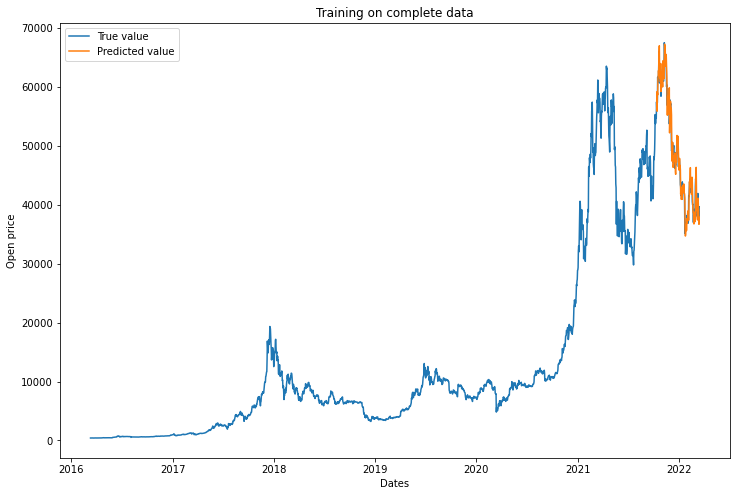

In [95]:
plt.figure(figsize=(12, 8))
daily_prediction = result_daily.predict(start=train_limit, end=len(X)-1)
plt.plot(X.index, X, label="True value")
plt.plot(daily_prediction, label="Predicted value")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Training on complete data")
plt.legend()

In [48]:
X_monthly = monthly_df
print("Total Length of data:",len(X_monthly))
print("90% of data will be:", len(X_monthly)*0.9)
train_limit_monthly = int(len(X_monthly)*0.9)

Total Length of data: 73
90% of data will be: 65.7


In [49]:
train_x_monthly = X_monthly[:train_limit_monthly]
test_x_monthly = X_monthly[train_limit_monthly:]

In [50]:
sarima_model_monthly = sm.tsa.statespace.SARIMAX(train_x_monthly, order=(2, 1, 0), seasonal_order=(1, 1, 0, 6))
result_monthly = sarima_model_monthly.fit()

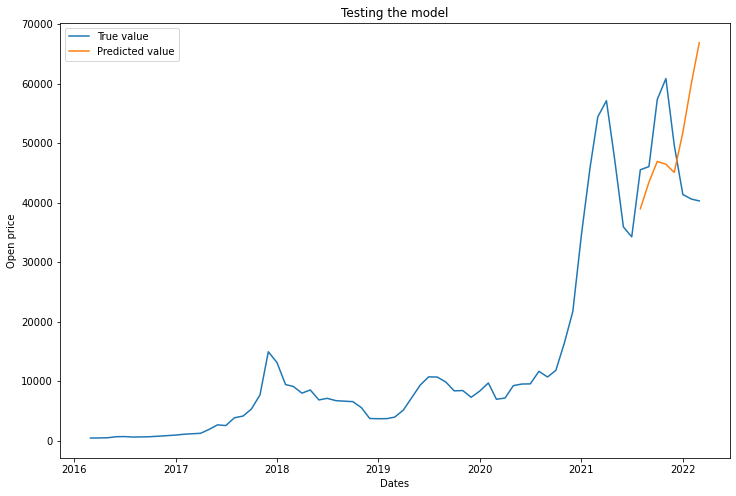

In [51]:
plt.figure(figsize=(12, 8))
monthly_prediction = result_monthly.predict(start=train_limit_monthly, end=len(X_monthly)-1)
plt.plot(X_monthly.index, X_monthly, label="True value")
plt.plot(monthly_prediction, label="Predicted value")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Testing the model")
plt.legend()

In [55]:
test_x_monthly

Date
2021-08-01    45501.877419
2021-09-01    46037.140000
2021-10-01    57333.477419
2021-11-01    60825.520000
2021-12-01    49642.796774
2022-01-01    41342.987097
2022-02-01    40572.103571
2022-03-01    40270.493333
Freq: MS, Name: Open, dtype: float64

In [56]:
monthly_prediction

2021-08-01    38942.270170
2021-09-01    43415.960273
2021-10-01    46897.015054
2021-11-01    46437.087480
2021-12-01    45058.252375
2022-01-01    51777.315634
2022-02-01    60117.230934
2022-03-01    66861.653429
Freq: MS, Name: predicted_mean, dtype: float64

In [57]:
print("Mean of target value:", test_x_monthly.mean())
print("Mean Absolute error:", mean_absolute_error(test_x_monthly, monthly_prediction))
print("Root mean squared error:", np.sqrt(mean_squared_error(test_x_monthly, monthly_prediction)))

Mean of target value: 47690.799451804916
Mean Absolute error: 11895.1052821971
Root mean squared error: 14074.981464339899


In [100]:
sarima_model_monthly = sm.tsa.statespace.SARIMAX(monthly_df, order=(2, 1, 0), seasonal_order=(1, 1, 0, 6))
result_monthly = sarima_model_monthly.fit()

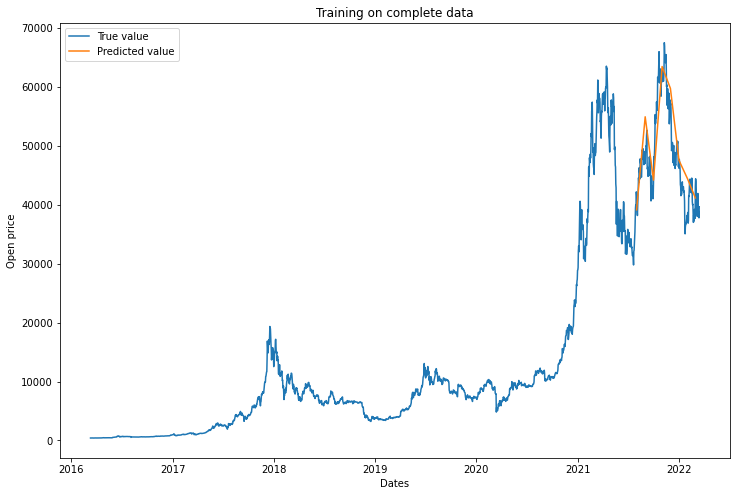

In [101]:
plt.figure(figsize=(12, 8))
monthly_prediction = result_monthly.predict(start=train_limit_monthly, end=len(X_monthly)-1)
plt.plot(X.index, X, label="True value")
plt.plot(monthly_prediction, label="Predicted value")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Training on complete data")
plt.legend()

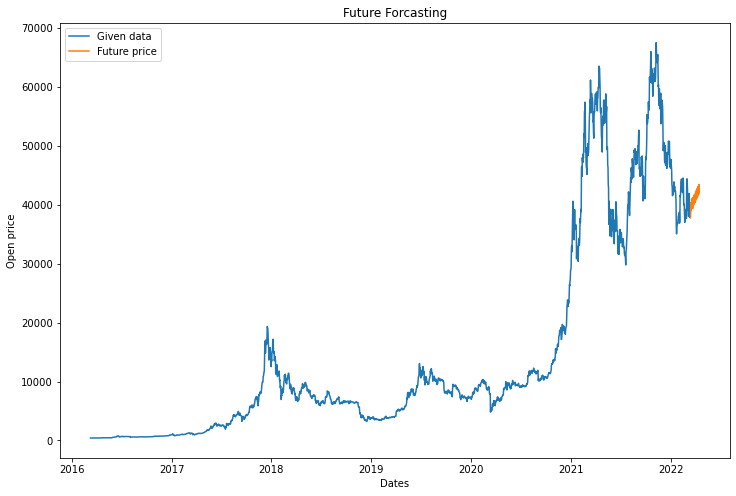

In [102]:
plt.figure(figsize=(12, 8))
future_pred = result_daily.predict(start=len(X)-1, end=len(X)+31)
plt.plot(X.index, X, label="Given data")
plt.plot(future_pred, label="Future price")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Future Forcasting")
plt.legend()

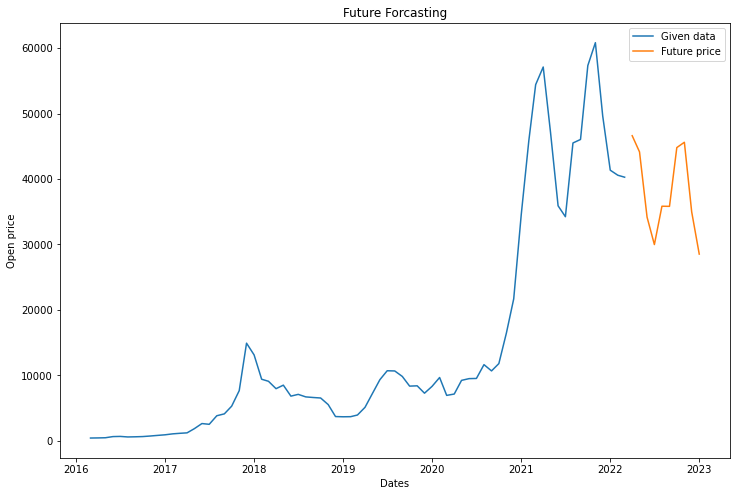

In [103]:
plt.figure(figsize=(12, 8))
future_pred_monthly = result_monthly.predict(start=len(X_monthly), end=len(X_monthly)+9)
plt.plot(X_monthly.index, X_monthly, label="Given data")
plt.plot(future_pred_monthly, label="Future price")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Future Forcasting")
plt.legend()

## Pickling the Final Models

In [104]:
import pickle

In [106]:
model_daily_path = '../models/bitcoin_daily.pkl'
pickle.dump(result_daily, open(model_daily_path, 'wb'))

In [107]:
model_monthly_path = '../models/bitcoin_monthly.pkl'
pickle.dump(result_monthly, open(model_monthly_path, 'wb'))